В этом мини-проекте проведем анализ данных о использовании платформы.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
user_data = pd.read_csv('C:/Users/yarus/projects/3_user_data.csv')

In [3]:
logs = pd.read_csv('C:/Users/yarus/projects/3_logs.csv')

 Посмотрим размеры таблиц, типы переменных, наличие пропущенных значений, описательную статистику.

In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [10]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

Пользователи осуществляют взаимодействие с трех платформ.

Выясним какие клиенты совершили больше всего успешных операций (success == True).

In [11]:
success_df = logs.loc[logs.success == True].client.value_counts()

In [12]:
success_df.max()

41

In [13]:
max_success_df = success_df.loc[success_df == success_df.max()]

In [14]:
max_success_df

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: client, dtype: int64

Определим с какой платформы осуществляется наибольшее количество успешных операций.

In [15]:
logs.loc[logs.success == True].platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

Можно заметить, что такой платформой является телефон.

Также определим какая платформа наиболее популярна среди премиумных клиентов.

In [16]:
clients = logs.merge(user_data, on='client')

In [17]:
clients.loc[clients.premium == True].platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Для премиумных клиентов такой палатформой также является телефон.

Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет).

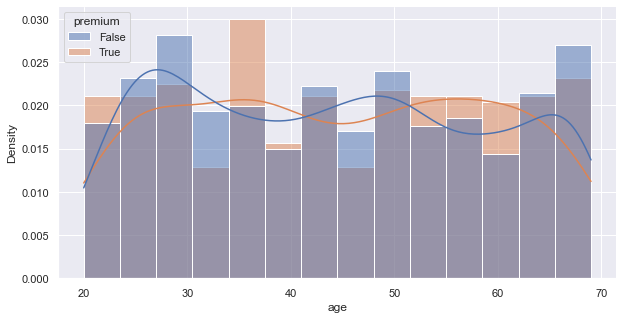

In [18]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(data=clients, x='age', 
            hue='premium',            
            kde=True, 
            stat='density', 
            common_norm=False, 
            bins=14)

sns.despine()

Построим график распределения числа успешных операций.

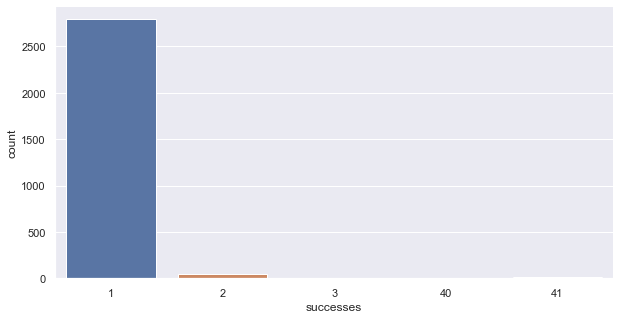

In [19]:
sns.countplot(x=logs.loc[logs.success == True].client.value_counts().rename('successes'))
sns.despine()

Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста
(x – возраст, y – число успешных операций).

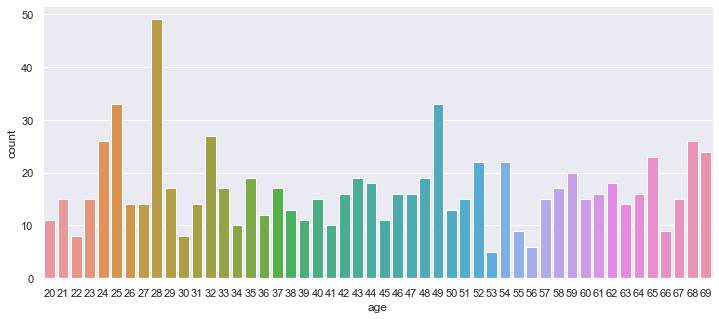

In [20]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(data=clients.loc[(clients.platform == 'computer') & (clients.success == True)],  x='age')
sns.despine()

Наибольшее количество успешных действий совершили клиенты 28 лет.